# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

**Instructions:**

To solve the TSP problem with simulated annealing use the code in the `./TSP` folder.

In the input file set the SA algorithm and set the probability of mutations to 1. In this way, one of the methods defined for the GA algorithm is used to create the next step during the annealing.

Finally run `./TSP/TSP`

In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [20]:
#load files TSP on a circle
cities = 32
generations_c = 250

best_len_c = []
tracks_c = []

positions_c = np.loadtxt("TSP/SA/circle/positions.dat")
best_len_c.append(np.loadtxt("TSP/SA/circle/best_lengths.dat"))
best_len_c.append(np.loadtxt("TSP/GA/circle/best_lengths.dat"))
tracks_c.append(np.loadtxt("TSP/SA/circle/best_tracks.dat"))
tracks_c.append(np.loadtxt("TSP/GA/circle/best_tracks.dat"))

x_c, y_c = [np.sin(positions_c), np.cos(positions_c)]
x_c = np.append(x_c, x_c[0])
y_c = np.append(y_c, y_c[0])
tracks_c[0] = np.append(tracks_c[0], np.ones((generations_c, 1)), axis=1)
tracks_c[1] = np.append(tracks_c[1], np.ones((generations_c, 1)), axis=1)
best_track_c = (np.array(tracks_c)[:,-1])

x_c_sa = x_c[best_track_c[0].astype('int')-1]
y_c_sa = y_c[best_track_c[0].astype('int')-1]

x_c_ga = x_c[best_track_c[1].astype('int')-1]
y_c_ga = y_c[best_track_c[1].astype('int')-1]

In [24]:
# load files TSP in a square
cities = 32
generations_s = 500

best_len_s = []
tracks_s = []

x_s, y_s = np.loadtxt("TSP/SA/square/positions.dat", unpack=True)
best_len_s.append(np.loadtxt("TSP/SA/square/best_lengths.dat"))
best_len_s.append(np.loadtxt("TSP/GA/square/best_lengths.dat"))
tracks_s.append(np.loadtxt("TSP/SA/square/best_tracks.dat"))
tracks_s.append(np.loadtxt("TSP/GA/square/best_tracks.dat"))

x_s = np.append(x_s, x_s[0])
y_s = np.append(y_s, y_s[0])
tracks_s[0] = np.append(tracks_s[0], np.ones((generations_s, 1)), axis=1)
tracks_s[1] = np.append(tracks_s[1], np.ones((generations_s, 1)), axis=1)
best_track_s = (np.array(tracks_s))[:,-1]

x_s_sa = x_s[best_track_s[0].astype('int')-1]
y_s_sa = y_s[best_track_s[0].astype('int')-1]

x_s_ga = x_s[best_track_s[1].astype('int')-1]
y_s_ga = y_s[best_track_s[1].astype('int')-1]

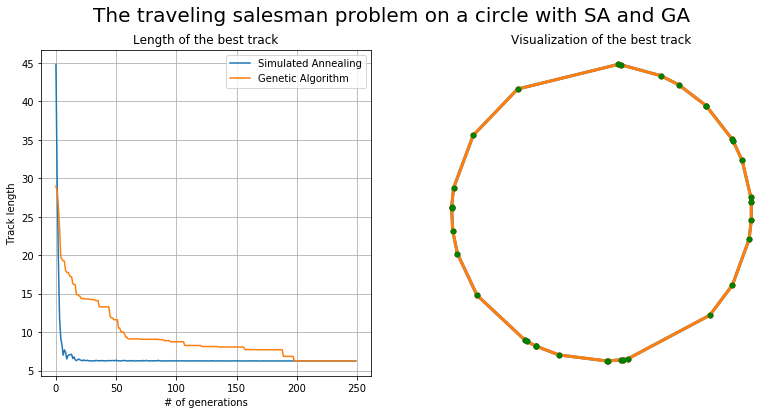

In [33]:
# Plots TSP on a circle
fig, ax = plt.subplots(1,2,figsize=(13,6))
ax[0].plot(best_len_c[0], label='Simulated Annealing')
ax[0].plot(best_len_c[1], label='Genetic Algorithm')
ax[0].set_xlabel('# of generations')
ax[0].set_ylabel('Track length')
ax[0].set_title('Length of the best track')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x_c_sa, y_c_sa, label='Track', lw=3, ls='-', marker='.', mec='r', mfc='r', ms=10)
ax[1].plot(x_c_ga, y_c_ga, label='Track', lw=3, ls='-', marker='.', mec='g', mfc='g', ms=10)
ax[1].axis('off')
ax[1].set_title('Visualization of the best track')

plt.suptitle('The traveling salesman problem on a circle with SA and GA', fontsize=20)
plt.show()

![SegmentLocal](TSP/gif/circle_ev_sa.gif "circle_sa")

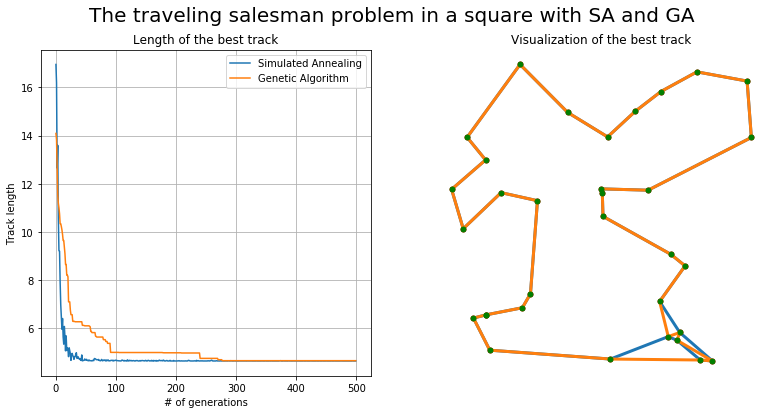

In [35]:
# Plots TSP in a square
fig, ax = plt.subplots(1,2,figsize=(13,6))
ax[0].plot(best_len_s[0], label='Simulated Annealing')
ax[0].plot(best_len_s[1], label='Genetic Algorithm')
ax[0].set_xlabel('# of generations')
ax[0].set_ylabel('Track length')
ax[0].set_title('Length of the best track')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x_s_sa, y_s_sa, label='Track', lw=3, ls='-', marker='.', mec='r', mfc='r', ms=10)
ax[1].plot(x_s_ga, y_s_ga, label='Track', lw=3, ls='-', marker='.', mec='g', mfc='g', ms=10)
ax[1].axis('off')
ax[1].set_title('Visualization of the best track')

plt.suptitle('The traveling salesman problem in a square with SA and GA', fontsize=20)
plt.show()

![SegmentLocal](TSP/gif/square_ev_sa.gif "square_sa")

- **Comparing results between Genetic Algorithm and Simulated Annealing:**

|   | **Genetic Algorithm** <br /> <center>(*Circle*,*Square*)</center>| **Simulated Anneaing** <center>(*Circle*,*Square*)</center>  |
|:---:|:---:|:---:|
|  Time to execute (s)   |   18.942, 31.131 |  **13.555**, **25.754** |
|  Best track length  |   6.2403, 4.64898  | 6.2403, **4.63666**  |

From my results, I can conclude that the SA algorithm is faster and in the case of TSP in a square, with the same numbeer of generatin, found a better solution of the GA algorithm.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

**Instructions:**

The code used is in the folder `./MPI_TSP`.

Run `mpirun -np number_of_continents ./MPI_TSP/TSP` to solve the TSP problem with the GA algorithm.

In [90]:
#carico i files per 4,5,6 continenti
x, y = np.loadtxt("MPI_TSP/positions.dat", unpack=True);
x = np.append(x, x[0])
y = np.append(y, y[0])

files_len_4 = glob("MPI_TSP/4/best_lengths*.dat")
files_trk_4 = glob("MPI_TSP/4/best_tracks*.dat")
arrayl_4 = [np.loadtxt(file) for file in files_len_4]      # array con i valori per i singoli contitneti
arrayt_4 = [np.loadtxt(file) for file in files_trk_4]
tot_arrl_4 = np.concatenate(arrayl_4)             # unisco gli array per ottenere il miglior percorso
tot_arrt_4 = np.concatenate(arrayt_4)
best_4 = tot_arrt_4[np.where(tot_arrl_4==min(np.unique(np.sort(arrayl_4))))][0]    # miglior percorso
best_4 = np.append(best_4, 1)
x_4, y_4 = [x[best_4.astype('int')-1], y[best_4.astype('int')-1]]       # ordino le posizioni secondo il miglior percorso

# faccio le stesse cose per le altre simulazioni
files_len_5 = glob("MPI_TSP/5/best_lengths*.dat")
files_trk_5 = glob("MPI_TSP/5/best_tracks*.dat")
arrayl_5 = [np.loadtxt(file) for file in files_len_5]     
arrayt_5 = [np.loadtxt(file) for file in files_trk_5]
tot_arrl_5 = np.concatenate(arrayl_5)
tot_arrt_5 = np.concatenate(arrayt_5)
best_5 = tot_arrt_5[np.where(tot_arrl_5==min(np.unique(np.sort(arrayl_5))))][0]
best_5 = np.append(best_5, 1)
x_5, y_5 = [x[best_5.astype('int')-1], y[best_5.astype('int')-1]]

files_len_6 = glob("MPI_TSP/6/best_lengths*.dat")
files_trk_6 = glob("MPI_TSP/6/best_tracks*.dat")
arrayl_6 = [np.loadtxt(file) for file in files_len_6]   
arrayt_6 = [np.loadtxt(file) for file in files_trk_6]
tot_arrl_6 = np.concatenate(arrayl_6)
tot_arrt_6 = np.concatenate(arrayt_6)
best_6 = tot_arrt_6[np.where(tot_arrl_6==min(np.unique(np.sort(arrayl_6))))][0]
best_6 = np.append(best_6, 1)
x_6, y_6 = [x[best_6.astype('int')-1], y[best_6.astype('int')-1]]

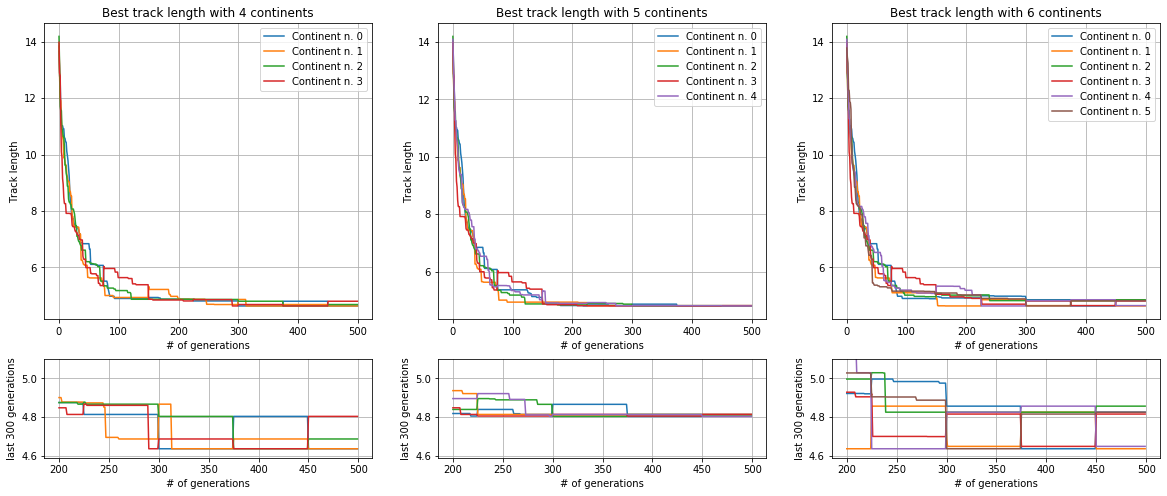

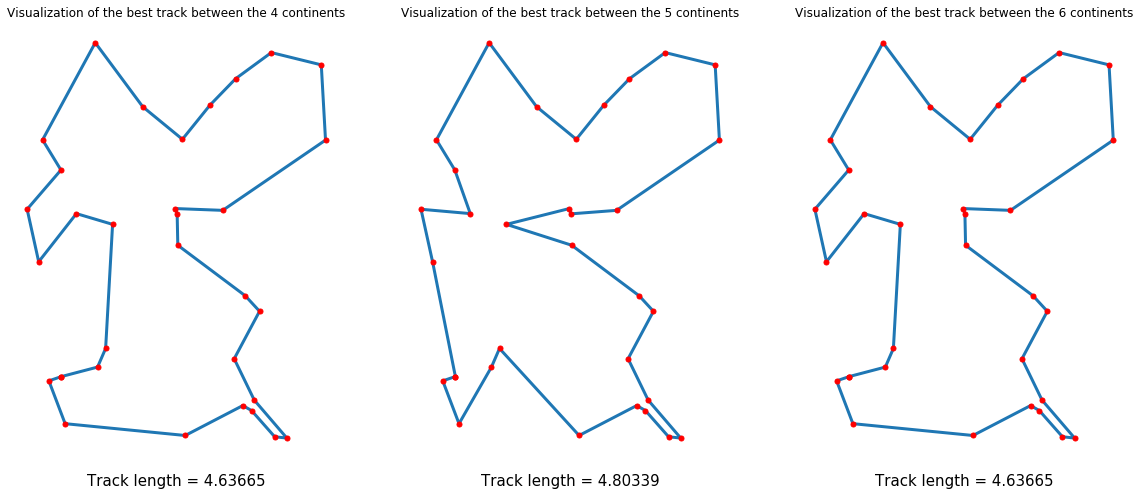

In [122]:
# Plot della lunghezza dei miglior circuiti nei singoli continenti in funzione delle generazioni
continents = [4,5,6]
files = [arrayl_4, arrayl_5, arrayl_6]
axes = [[x_4,y_4], [x_5,y_5], [x_6,y_6]]
fig, ax = plt.subplots(2,3, gridspec_kw={'height_ratios': [3,1]}, figsize=(20,8))
for j in range(3):
    for i in range(4):
        ax[0][j].plot(files[j][i], label='Continent n. {:.0f}'.format(i))
        ax[0][j].set_title('Best track length with {:.0f} continents'.format(continents[j]))
        ax[0][j].set_ylabel('Track length')
        ax[0][j].set_xlabel('# of generations')
        ax[0][j].grid(True)
        ax[1][j].plot(np.arange(200, 500, 1),files[j][i][200:])
        ax[1][j].set_ylim(4.59, 5.1)
        ax[1][j].set_ylabel('last 300 generations')
        ax[1][j].set_xlabel('# of generations')
        ax[1][j].grid(True)
ax[0][1].plot(files[1][4], label='Continent n. 4')
ax[1][1].plot(np.arange(200, 500, 1),files[1][4][200:])
ax[0][2].plot(files[2][4], label='Continent n. 4')
ax[1][2].plot(np.arange(200, 500, 1),files[2][4][200:])
ax[0][2].plot(files[2][5], label='Continent n. 5')
ax[1][2].plot(np.arange(200, 500, 1),files[2][5][200:])

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()

# Visualizzazione del miglior circuito tra tutti i continenti
fig, ax = plt.subplots(1,3, figsize=(20,8))
for j in range(3):
    ax[j].plot(axes[j][0], axes[j][1], lw=3, ls='-', marker='.', mec='r', mfc='r', ms=10)
    ax[j].axis('off')
    ax[j].set_title('Visualization of the best track between the {:.0f} continents'.format(continents[j]))

ax[0].text(0.2,-0.1,'Track length = {:.5f}'.format(min(np.unique(np.sort(arrayl_4)))), fontsize=15)
ax[1].text(0.2,-0.1,'Track length = {:.5f}'.format(min(np.unique(np.sort(arrayl_5)))), fontsize=15)
ax[2].text(0.2,-0.1,'Track length = {:.5f}'.format(min(np.unique(np.sort(arrayl_6)))), fontsize=15)
plt.show()